# **Heston Stochastic Volatility Model**

## **1. Introduction**
The Heston Model is a **stochastic volatility model** that extends the Black-Scholes model by allowing **volatility to be random**. It assumes that asset prices exhibit **volatility clustering** and **mean-reverting volatility**, which are observed in real financial markets.

Unlike the Black-Scholes model, which assumes **constant volatility**, the Heston model introduces a **stochastic process** for volatility, making it more realistic for pricing **options and other derivatives**.

---

## **2. Model Equations**
The Heston model describes the evolution of an asset price \( S(t) \) and its variance \( v(t) \) using the following **stochastic differential equations (SDEs)**:

### **2.1. Asset Price Process**
$$
dS(t) = \mu S(t) dt + \sqrt{v(t)} S(t) dW_S(t)
$$

where:
- \( S(t) \) = Asset price at time \( t \)
- \( \mu \) = Risk-free rate
- \( v(t) \) = Stochastic variance (volatility squared)
- \( W_S(t) \) = Standard Brownian motion for the asset price

### **2.2. Variance Process (Mean-Reverting)**
$$
dv(t) = \kappa (\theta - v(t)) dt + \xi \sqrt{v(t)} dW_v(t)
$$

where:
- \( v(t) \) = Variance (or squared volatility)
- \( \kappa \) = Speed of mean reversion
- \( \theta \) = Long-term average variance (mean reversion level)
- \( \xi \) = Volatility of volatility (volvol)
- \( W_v(t) \) = Standard Brownian motion for volatility

### **2.3. Correlation Between Brownian Motions**
$$
dW_v(t) = \rho dW_S(t) + \sqrt{1 - \rho^2} dZ(t)
$$

where:
- \( \rho \) = Correlation between asset price and variance
- \( dZ(t) \) = Independent Wiener process

The correlation parameter \( \rho \) determines how **asset prices and volatility interact**:
- **\( \rho < 0 \)**: Negative correlation (commonly observed in real markets)
- **\( \rho > 0 \)**: Positive correlation
- **\( \rho = 0 \)**: No correlation

---

## **3. Interpretation of Parameters**
| Parameter  | Meaning |
|------------|---------|
| \( \mu \) | Risk-free rate of return |
| \( v(t) \) | Instantaneous variance (squared volatility) |
| \( \kappa \) | Speed at which variance reverts to \( \theta \) |
| \( \theta \) | Long-term variance level |
| \( \xi \) | Volatility of volatility (controls fluctuations in \( v(t) \)) |
| \( \rho \) | Correlation between asset price and variance |

- **High \( \kappa \)** → Faster mean reversion to \( \theta \).
- **High \( \xi \)** → More volatile changes in variance.
- **Negative \( \rho \)** → Large price drops cause volatility to increase (volatility clustering).

---

## **4. Simulation Using Euler-Maruyama Method**
The Heston model is **not analytically solvable**, so we use numerical methods like **Euler-Maruyama discretization** to approximate its behavior.

### **4.1. Discrete Approximation**
For small time step \( dt \), we approximate:

#### **Asset Price**
$$
S_{t+dt} = S_t \exp \left( (\mu - \frac{1}{2} v_t) dt + \sqrt{v_t} dW_S \right)
$$

#### **Variance Process**
$$
v_{t+dt} = v_t + \kappa (\theta - v_t) dt + \xi \sqrt{v_t} dW_v
$$

where:
- \( dW_S \sim \mathcal{N}(0, dt) \) (normal random variable)
- \( dW_v = \rho dW_S + \sqrt{1 - \rho^2} dZ \) (correlated Brownian motion)

---

## **5. Key Features of the Heston Model**
1. **Volatility Clustering**: Large price movements are followed by periods of high volatility.
2. **Mean Reversion**: Volatility tends to return to its long-term mean \( \theta \).
3. **Leverage Effect**: Negative correlation \( \rho \) means price drops cause higher volatility.
4. **Smile and Skew in Option Pricing**: Unlike Black-Scholes, Heston accounts for volatility **smiles** and **skews** observed in options markets.

---

## **6. Applications of the Heston Model**
- **Option Pricing**: Used in financial derivatives pricing.
- **Risk Management**: Helps estimate potential risk and hedging strategies.
- **Market Simulation**: Generates realistic price paths for backtesting trading strategies.

---

## **7. Conclusion**
The Heston model is one of the most widely used **stochastic volatility models** in finance. By introducing **random volatility**, it provides a more accurate representation of real-world asset price behavior than the traditional Black-Scholes model.

However, numerical implementation is required to estimate its parameters and simulate price paths due to its complexity.


# Modelling

## Loading the Nifty50 4 years data (Jan 2020- Jan 2024)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Fetch the Nifty50 data
symbol = "^NSEI"  # Nifty50 Index
df1 = yf.download(symbol, start="2020-01-01", end="2024-01-01")
if isinstance(df1.columns, pd.MultiIndex):
    df1.columns = ['_'.join(col).strip() for col in df1.columns]
df1['LogReturn'] = np.log(data['Close_^NSEI'] / df1['Close_^NSEI'].shift(1))
returns = df['LogReturn'].dropna()

[*********************100%***********************]  1 of 1 completed


# **Heston Model Simulation Function**

This code block defines the **Heston Model** to generate a **synthetic stock price** and **volatility path** over one year (**252 trading days**).  

The model assumes that **volatility is stochastic**, meaning it **changes over time** rather than remaining constant (as in the Black-Scholes model).  


In [33]:
# Function to simulate Heston model
def heston_simulation(S0, v0, kappa, theta, xi, rho, mu, T, dt, num_steps):
    # Initialize arrays to store stock price and variance
    S = np.zeros(num_steps)
    v = np.zeros(num_steps)
    S[0] = S0
    v[0] = v0
    
    # Simulate paths using Euler-Maruyama method
    for t in range(1, num_steps):
        # Generate random variables for Brownian motions
        dW_S = np.random.normal(0, np.sqrt(dt))  # Stock price increment
        dW_v = np.random.normal(0, np.sqrt(dt))  # Volatility increment
        
        # Ensure correlation between dW_S and dW_v
        dW_v = rho * dW_S + np.sqrt(1 - rho**2) * dW_v
        
        # Simulate variance process
        v[t] = v[t-1] + kappa * (theta - v[t-1]) * dt + xi * np.sqrt(v[t-1]) * dW_v
        
        # Ensure non-negative variance
        v[t] = max(v[t], 0)
        
        # Simulate stock price process
        S[t] = S[t-1] * np.exp((mu - 0.5 * v[t-1]) * dt + np.sqrt(v[t-1]) * dW_S)
    
    return S, v

## **Simulation Process**

The simulation follows these steps:  

1. **Initialize** the stock price $S_t$ and volatility $v_t$.  
2. **Iterate** through **252 time steps** (trading days), updating both stock price and volatility at each step:  

   - Generate two random **Brownian motion increments**:  
     - Stock price changes: $dW_S$  
     - Volatility changes: $dW_v$  

   - Ensure correlation between stock and volatility using the correlation coefficient $\rho$:  
     $$dW_v = \rho dW_S + \sqrt{1 - \rho^2} \cdot dW_v$$

   - **Update volatility** $v_t$ using the **mean-reverting variance equation**:  
     $$dv_t = \kappa (\theta - v_t) dt + \xi \sqrt{v_t} dW_v$$  
     where:  
     - $\kappa$ = Rate of mean reversion  
     - $\theta$ = Long-term variance  
     - $\xi$ = Volatility of volatility  

   - **Ensure non-negative variance** by setting:  
     $$v_t = \max(v_t, 0)$$  

   - **Update the stock price** $S_t$ using:  
     $$S_t = S_{t-1} \cdot \exp \left( (\mu - 0.5 v_{t-1}) dt + \sqrt{v_{t-1}} dW_S \right)$$  
     where:  
     - $\mu$ = Risk-free rate  

This process **simulates** a realistic **stochastic volatility model**, where volatility fluctuates dynamically rather than being constant.


## sample Parameters (Assumed) 

In [34]:
# Parameters for the Heston model
S0 = 100  # Initial stock price
v0 = 0.04  # Initial volatility (variance)
kappa = 1.5  # Rate of mean reversion
theta = 0.04  # Long-term variance
xi = 0.3  # Volatility of volatility
rho = -0.5  # Correlation between asset and volatility
mu = 0.05  # Risk-free rate
T = 1  # Time horizon (1 year)
dt = 1/252  # Time step (1 trading day)
num_steps = 252  # Number of steps (252 trading days)


## Execute/Call the function

In [35]:
# Run the simulation
S, v = heston_simulation(S0, v0, kappa, theta, xi, rho, mu, T, dt, num_steps)


## Plotting the result

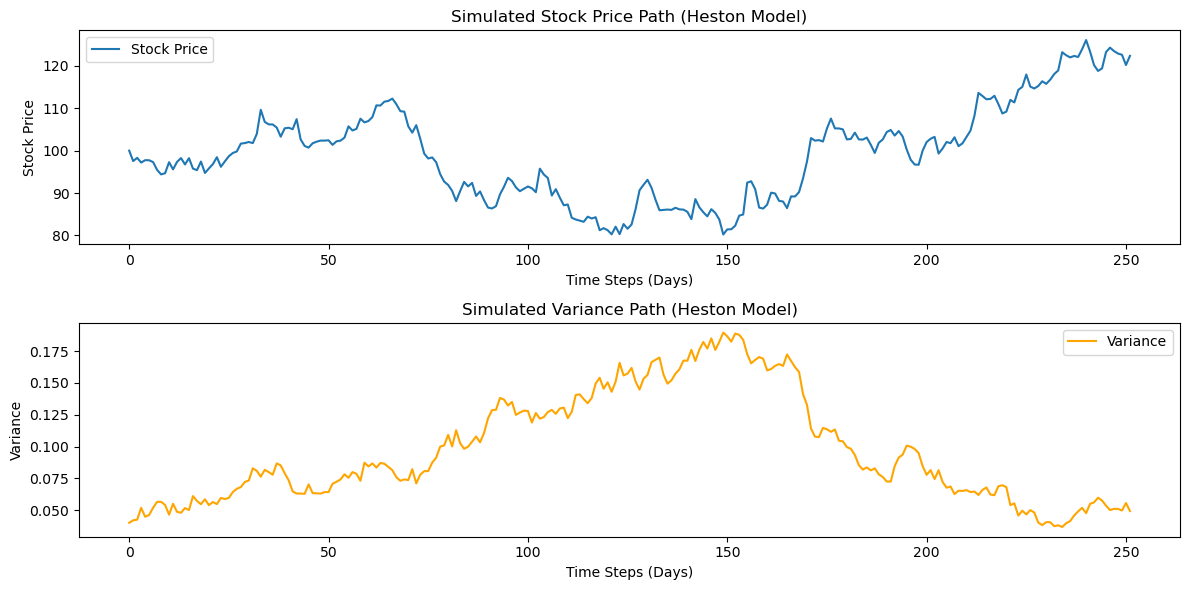

In [36]:
# Plot the simulated stock price and variance paths
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(S, label="Stock Price")
plt.title("Simulated Stock Price Path (Heston Model)")
plt.xlabel("Time Steps (Days)")
plt.ylabel("Stock Price")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(v, label="Variance", color="orange")
plt.title("Simulated Variance Path (Heston Model)")
plt.xlabel("Time Steps (Days)")
plt.ylabel("Variance")
plt.legend()

plt.tight_layout()
plt.show()


## **Key Observations from the Heston Model Simulation**

- The **stock price path** fluctuates based on both **return dynamics** and **changing volatility**.  
- The **variance (volatility) path** exhibits **mean reversion**, meaning it tends to revert toward its long-term average **$\theta$**:  
  $$ v_t \to \theta \text{ as time progresses} $$
- The model captures **volatility clustering**, a key feature of real financial markets where periods of high volatility tend to be followed by more volatility, and vice versa.  
- The **Heston model** is useful for:  
  - **Pricing options** more accurately than constant-volatility models.  
  - **Risk management**, as it accounts for stochastic volatility.  
  - **Simulating realistic financial market behavior** for various quantitative finance applications.  
